In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Clustered_Marketing_Campaign.csv")

In [ ]:
df.head()

,Unnamed: 0,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Complain,Response,Customer_Dur,Age,Spent,Living_Status,Children_Count,Family_Member_Count,Is_Parent,Clusters
0,0,0,58138.0,0,0,58,635,88,546,172,...,0,1,83894400000000000,67,1617,0,0,1,0,1
1,1,0,46344.0,1,1,38,11,1,6,2,...,0,0,10800000000000000,70,27,0,2,3,1,3
2,2,0,71613.0,0,0,26,426,49,127,111,...,0,0,40780800000000000,59,776,1,0,2,0,1
3,3,0,26646.0,1,0,26,11,4,20,10,...,0,0,5616000000000000,40,53,1,1,3,1,2
4,4,1,58293.0,1,0,94,173,43,118,46,...,0,0,27734400000000000,43,422,1,1,3,1,0


In [ ]:
df.shape

(2212, 32)

In [ ]:
X = scaled_df[["Is_Parent","Income","Teenhome","Kidhome","Age","Family_Member_Count","Spent"]]
y = df["Clusters"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, min_samples_split=25,random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9661399548532731


In [ ]:
import pickle
with open("customer_classification_model.pkl", "wb") as f:
    pickle.dump(random_forest, f)

F1 Score: 0.865066151594235


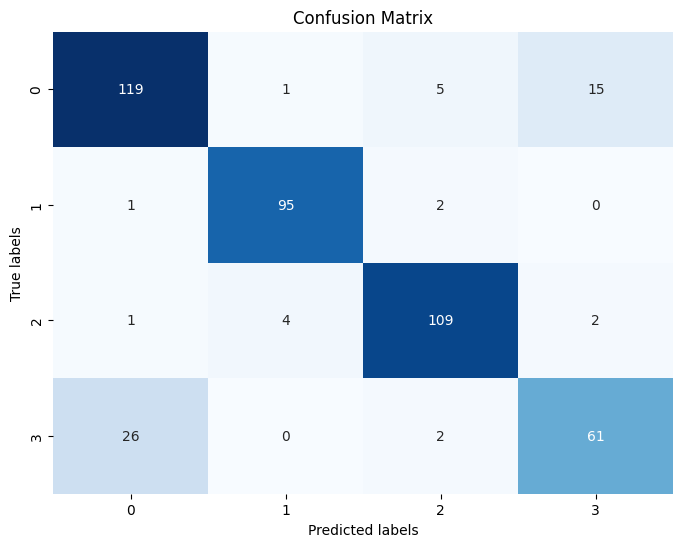

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
